# Assignment 5
Author: Anna Lozenko

In this Jupyter notebook, I will analyze Ireland's population data focusing on the differences between sexes by age groups, initally for Ireland as a whole and then for different regions within Ireland.

The data is contained in a CSV file that has been downloaded from the [Central Statistics Office Ireland](https://data.cso.ie/#) website, for census year 2022.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [2]:
# import the population data from the CSV file as a Pandas DataFrame and display the first 5 rows
df = pd.read_csv("population.csv")
print(df.head(5))

  Statistic Label  CensusYear         Sex Single Year of Age  \
0      Population        2022  Both sexes           All ages   
1      Population        2022  Both sexes           All ages   
2      Population        2022  Both sexes           All ages   
3      Population        2022  Both sexes           All ages   
4      Population        2022  Both sexes           All ages   

                 Administrative Counties    UNIT    VALUE  
0                                Ireland  Number  5149139  
1                  Carlow County Council  Number    61968  
2                    Dublin City Council  Number   592713  
3  Dún Laoghaire Rathdown County Council  Number   233860  
4                  Fingal County Council  Number   330506  


Check for missing values in the dataframe.

In [3]:
df.isnull().sum()

Statistic Label            0
CensusYear                 0
Sex                        0
Single Year of Age         0
Administrative Counties    0
UNIT                       0
VALUE                      0
dtype: int64

Drop unnecessary row values from the dataframe, as we are interested in specific age groups and sexes.

In [4]:
# drop all rows with 'All ages' in the 'Single Year of Age' column
df = df[df['Single Year of Age'] != 'All ages']
#drop all rows with 'Both sexes' in the 'Sex' column
df = df[df['Sex'] != 'Both sexes']

In [5]:
#check the dataframe after dropping unnecessary rows
df.head(3)

,Statistic Label,CensusYear,Sex,Single Year of Age,Administrative Counties,UNIT,VALUE
3296,Population,2022,Male,Under 1 year,Ireland,Number,29610
3297,Population,2022,Male,Under 1 year,Carlow County Council,Number,346
3298,Population,2022,Male,Under 1 year,Dublin City Council,Number,3188


Improve data types consistency in the 'Single Year of Age' column by replacing non-numeric values with numeric ones and converting the column to integer type.

In [6]:
# replace "Under 1 year" with "0"
df["Single Year of Age"] = df["Single Year of Age"].str.replace("Under 1 year", "0", regex=True)
df.head(3)

,Statistic Label,CensusYear,Sex,Single Year of Age,Administrative Counties,UNIT,VALUE
3296,Population,2022,Male,0,Ireland,Number,29610
3297,Population,2022,Male,0,Carlow County Council,Number,346
3298,Population,2022,Male,0,Dublin City Council,Number,3188


In [7]:
# replace "100 years and over" with "100"
df["Single Year of Age"] = df["Single Year of Age"].str.replace("100 years and over", "100", regex=True)
df.tail(3)

,Statistic Label,CensusYear,Sex,Single Year of Age,Administrative Counties,UNIT,VALUE
9789,Population,2022,Female,100,Cavan County Council,Number,12
9790,Population,2022,Female,100,Donegal County Council,Number,31
9791,Population,2022,Female,100,Monaghan County Council,Number,7


In [8]:
# remove any remaining non-numeric characters (like "years") from the 'Single Year of Age' column and convert the column to integer type
df["Single Year of Age"] = df["Single Year of Age"].str.replace('\\D', '', regex=True).astype(int)
df.head(3)

,Statistic Label,CensusYear,Sex,Single Year of Age,Administrative Counties,UNIT,VALUE
3296,Population,2022,Male,0,Ireland,Number,29610
3297,Population,2022,Male,0,Carlow County Council,Number,346
3298,Population,2022,Male,0,Dublin City Council,Number,3188


In [9]:
#check the data types of the columns
df.dtypes

Statistic Label            object
CensusYear                  int64
Sex                        object
Single Year of Age          int32
Administrative Counties    object
UNIT                       object
VALUE                       int64
dtype: object

Drop unnecessary columns.

In [10]:
# Get the list of column names
df.columns.values.tolist()

['Statistic Label',
 'CensusYear',
 'Sex',
 'Single Year of Age',
 'Administrative Counties',
 'UNIT',
 'VALUE']

In [11]:
#Keep only the relevant columns
df = df[['Sex', 'Single Year of Age', 'VALUE', 'Administrative Counties']]
df.head(5)

,Sex,Single Year of Age,VALUE,Administrative Counties
3296,Male,0,29610,Ireland
3297,Male,0,346,Carlow County Council
3298,Male,0,3188,Dublin City Council
3299,Male,0,1269,Dún Laoghaire Rathdown County Council
3300,Male,0,2059,Fingal County Council


## Data Analysis

The first part of our analysis will focus on Ireland as a whole and data is filtered to keep only the rows corresponding to 'Ireland' in the 'Administrative Counties' column.

In [12]:
# drop all counties except 'Ireland'
df_ireland = df[df['Administrative Counties'] == 'Ireland']
df_ireland.head(5)

,Sex,Single Year of Age,VALUE,Administrative Counties
3296,Male,0,29610,Ireland
3328,Male,1,28875,Ireland
3360,Male,2,30236,Ireland
3392,Male,3,31001,Ireland
3424,Male,4,31686,Ireland


A pivot table is created to summarize the population data for Ireland, with 'Single Year of Age' as the index, 'Sex' as the columns, and the sum of 'VALUE' as the values.

In [13]:
# create the pivot table and display the first 5 rows
pivot_ireland= pd.pivot_table(df_ireland, "VALUE", "Single Year of Age", "Sex", "sum")
pivot_ireland.head()

Sex,Female,Male
Single Year of Age,,
0,28186,29610
1,27545,28875
2,28974,30236
3,29483,31001
4,29819,31686


### 70% Part

**TASK 1**
Analyze the cleaned data by calculating the weighted mean age by sex.

In [14]:
# calculate the weighted mean age by sex for females
wm_fem = (pivot_ireland.index * pivot_ireland["Female"]).sum() / pivot_ireland["Female"].sum()
print("Weighted mean age for females:", wm_fem)

Weighted mean age for females: 38.9397958987787


In [15]:
# calculate the weighted mean age by sex for males
wm_male = (pivot_ireland.index * pivot_ireland["Male"]).sum() / pivot_ireland["Male"].sum()
print("Weighted mean age for males:", wm_male)

Weighted mean age for males: 37.7394477371039


**TASK 2**
Calculate the differences between the sexes by age, i.e compute the difference between the number of males and females at each age. The result will be displayed as a new column in the pivot table.

In [16]:
#create the new column 'Difference' in the pivot table
pivot_ireland["Difference"] = pivot_ireland["Male"] - pivot_ireland["Female"]
pivot_ireland.head()


Sex,Female,Male,Difference
Single Year of Age,,,
0,28186,29610,1424
1,27545,28875,1330
2,28974,30236,1262
3,29483,31001,1518
4,29819,31686,1867


Positive values in the 'Difference' column indicate that there are more males than females at that age, while negative values indicate that there are more females.

### 20% Part

Create an age variable. Create an age group that includes people with ages within 5 years of the age variable and analyze the differences between sexes for that age group.

In [17]:
age_var= 30  #select age variable, e.g., 30 years

In [18]:
 # filter data of the cleaned dataframe for the age group 25-35
age_group= df[(df['Single Year of Age'] >= age_var - 5) & (df['Single Year of Age'] <= age_var + 5)]
age_group.head()

,Sex,Single Year of Age,VALUE,Administrative Counties
4096,Male,25,29969,Ireland
4097,Male,25,330,Carlow County Council
4098,Male,25,5634,Dublin City Council
4099,Male,25,1532,Dún Laoghaire Rathdown County Council
4100,Male,25,1831,Fingal County Council


In [19]:
# filter data for 'Ireland' only
age_group_ireland = age_group[age_group['Administrative Counties'] == 'Ireland']
age_group_ireland = pd.pivot_table(age_group_ireland, "VALUE", "Single Year of Age", "Sex", "sum")
age_group_ireland.head()

Sex,Female,Male
Single Year of Age,,
25,29294,29969
26,28864,29376
27,29528,29162
28,29788,28902
29,30936,29989


In [20]:
# calculate the total number of males and females for the age group and compute the difference between them
fem_sum= age_group_ireland["Female"].sum()
male_sum= age_group_ireland["Male"].sum()
mal_fem_difference_ireland= male_sum - fem_sum
print(mal_fem_difference_ireland)

-15446


The difference in number between males and females for the age group 25-35 indicates that there are 15446 more females than males in this age category.

### 10% Part

Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group.

This time we will filter data by 'Administrative Counties' instead of 'Ireland' only.

In [21]:
# filter data for the age group 25-35 keeping all Administrative Counties, not just 'Ireland'
age_group_counties = age_group[age_group['Administrative Counties'] != 'Ireland']
age_group_counties.head()

,Sex,Single Year of Age,VALUE,Administrative Counties
4097,Male,25,330,Carlow County Council
4098,Male,25,5634,Dublin City Council
4099,Male,25,1532,Dún Laoghaire Rathdown County Council
4100,Male,25,1831,Fingal County Council
4101,Male,25,1761,South Dublin County Council


In [22]:
# create a pivot table to summarize the population data for the age group across different regions
age_group_counties = pd.pivot_table(age_group_counties, "VALUE", ["Single Year of Age", "Administrative Counties"], "Sex", "sum")
age_group_counties.head()

Sex                                         Female  Male
Single Year of Age Administrative Counties              
25                 Carlow County Council       295   330
                   Cavan County Council        403   438
                   Clare County Council        631   627
                   Cork City Council          1733  1779
                   Cork County Council        1502  1590

In [23]:
# calculate the difference between males and females for the age group across different regions
age_group_counties["Difference"] = age_group_counties["Male"] - age_group_counties["Female"]
age_group_counties.head()

Sex                                         Female  Male  Difference
Single Year of Age Administrative Counties                          
25                 Carlow County Council       295   330          35
                   Cavan County Council        403   438          35
                   Clare County Council        631   627          -4
                   Cork City Council          1733  1779          46
                   Cork County Council        1502  1590          88

We want to know which region has the biggest population difference between the sexes in the age group, so we will group by 'Administrative Counties' and sum the absolute values of the 'Difference' column. Different regions may have positive or negative differences, but we are interested in the magnitude of the difference. So we will take the absolute value of the differences before summing them up.

In [24]:
# group by 'Administrative Counties' and sum the absolute values of the 'Difference' column
region_diff = age_group_counties.groupby("Administrative Counties")["Difference"].apply(lambda x: x.abs().sum())
region_diff = region_diff.reset_index() # reset index to turn the series into a dataframe
region_diff = region_diff.sort_values(by="Difference", ascending=False) # sort the dataframe by 'Difference' in descending order
region_diff.head()

,Administrative Counties,Difference
8,Fingal County Council,1895
25,South Dublin County Council,1878
4,Cork County Council,1464
20,Meath County Council,1147
12,Kildare County Council,1135


Fingal County Council has the biggest population difference between the sexes, followed by South Dublin County Council and Cork County Council.

We can also visualize the differences between sexes for that age group across different regions using a bar plot.

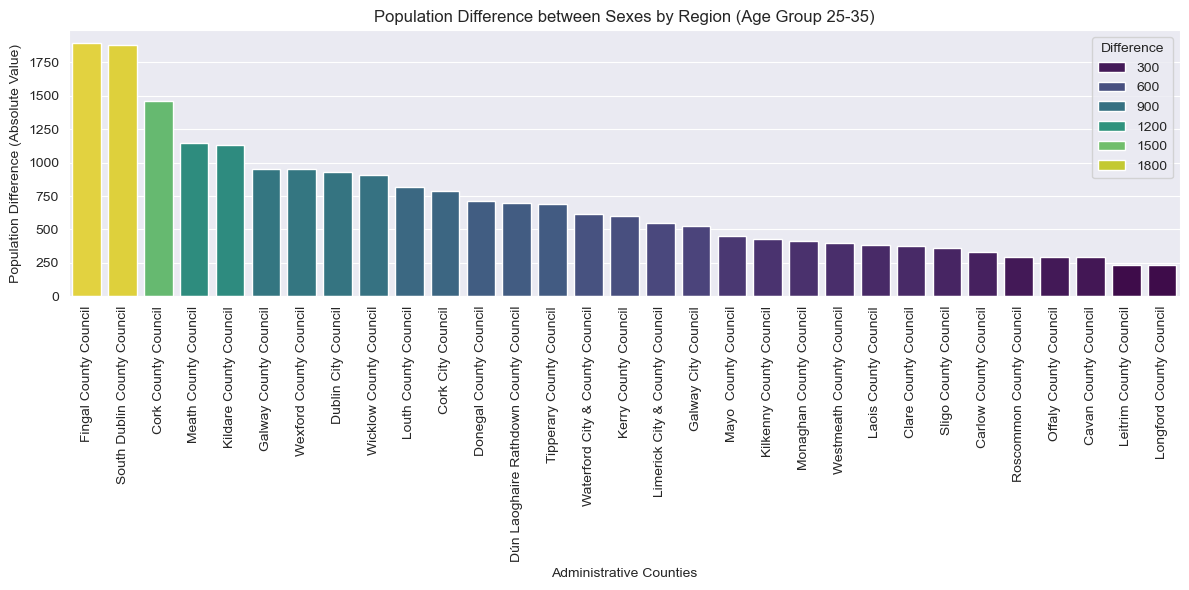

In [25]:
# create a bar plot to visualize the differences between sexes for the age group across different regions
plt.figure(figsize=(12, 6))
sns.barplot(data=region_diff, x="Administrative Counties", y="Difference", palette="viridis", hue= "Difference", dodge=False)
plt.xticks(rotation=90)
plt.title("Population Difference between Sexes by Region (Age Group 25-35)")
plt.xlabel("Administrative Counties")
plt.ylabel("Population Difference (Absolute Value)")
plt.tight_layout()
plt.show()

### End